In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
predicted_data=pd.read_csv('predicted_data.csv')

In [20]:
# Threshold per Provider_Type based on max normal value
thresholds = predicted_data[predicted_data['Anomaly_Flag'] == 0].groupby('Provider_Type')['Number_of_Services'].max()
print("Thresholds for Normal Transactions by Provider_Type:\n", thresholds)


Thresholds for Normal Transactions by Provider_Type:
 Provider_Type
Addiction Medicine                                  214.0
Advanced Heart Failure and Transplant Cardiology     81.0
All Other Suppliers                                 477.0
Allergy/ Immunology                                 677.0
Ambulance Service Provider                          576.4
                                                    ...  
Surgical Oncology                                   471.0
Thoracic Surgery                                    274.0
Undefined Physician type                            342.0
Urology                                             700.0
Vascular Surgery                                    665.0
Name: Number_of_Services, Length: 90, dtype: float64


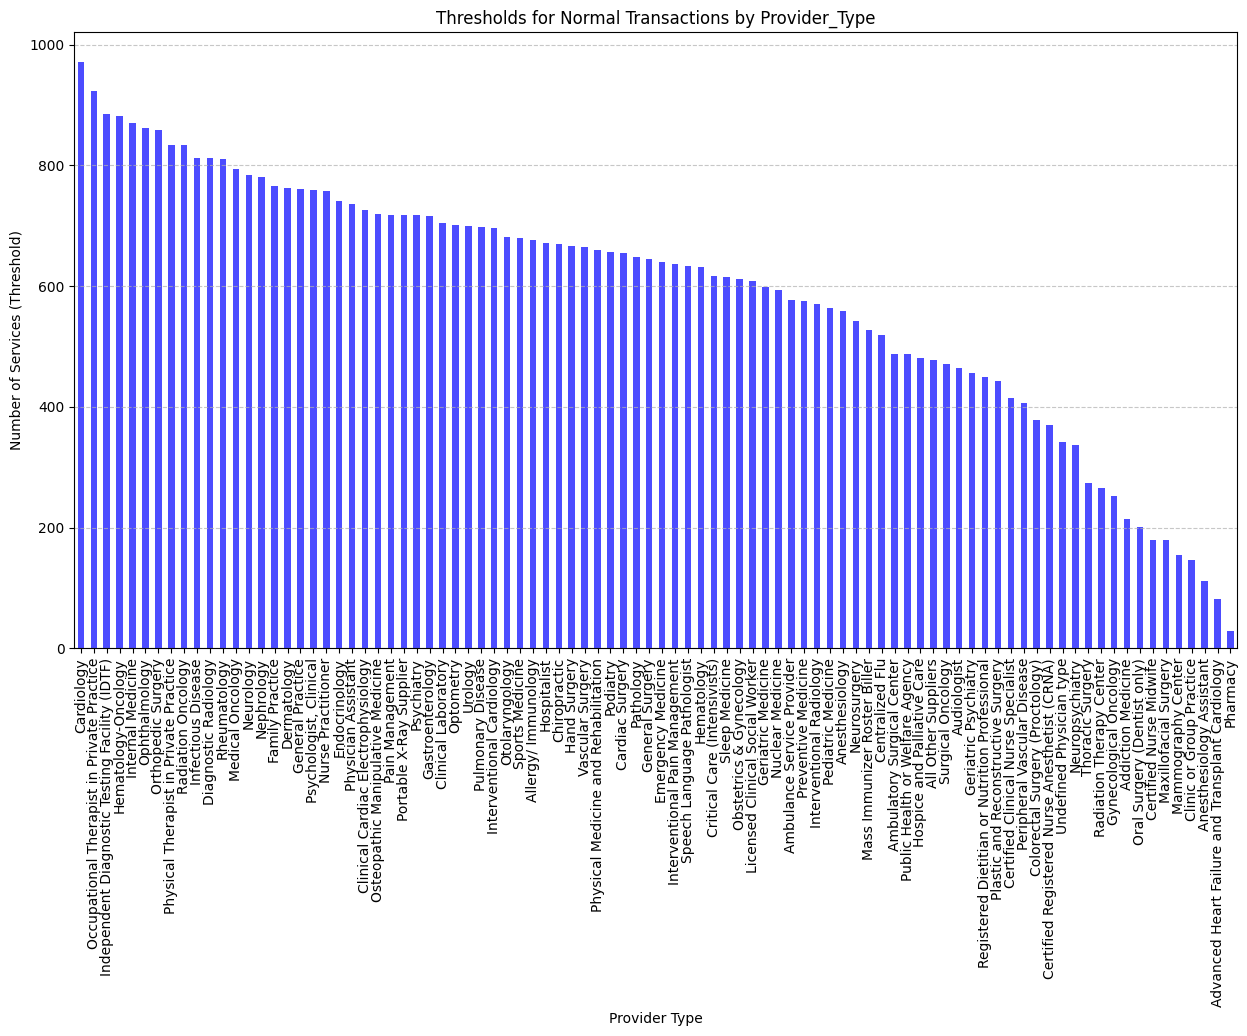

In [21]:
import matplotlib.pyplot as plt

# Calculate thresholds for normal transactions by Provider_Type
thresholds = predicted_data[predicted_data['Anomaly_Flag'] == 0].groupby('Provider_Type')['Number_of_Services'].max()

# Plot the thresholds
plt.figure(figsize=(15, 8))
thresholds.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Thresholds for Normal Transactions by Provider_Type')
plt.ylabel('Number of Services (Threshold)')
plt.xlabel('Provider Type')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
# Find the Provider_Type with the highest number of anomalies
anomalies_by_provider = predicted_data[predicted_data['Anomaly_Flag'] == 1].groupby('Provider_Type')['Anomaly_Flag'].count()

# Identify the Provider_Type with the highest anomalies
highest_anomaly_provider = anomalies_by_provider.idxmax()
highest_anomaly_count = anomalies_by_provider.max()

highest_anomaly_provider, highest_anomaly_count


('Ophthalmology', 474)

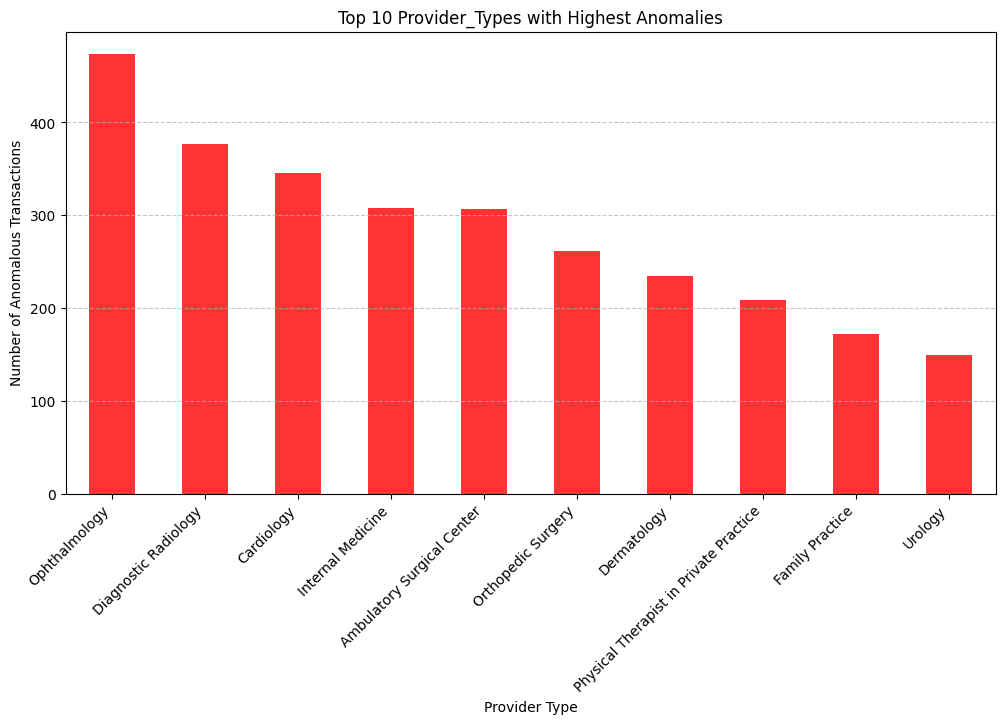

In [32]:
import matplotlib.pyplot as plt

# Filter for anomaly transactions
anomalies_by_provider = predicted_data[predicted_data['Anomaly_Flag'] == 1].groupby('Provider_Type')['Anomaly_Flag'].count()

# Sort and take the top 10 providers with the highest anomalies
top_10_anomalies = anomalies_by_provider.sort_values(ascending=False).head(10)

# Plot the top 10 providers with anomalies
plt.figure(figsize=(12, 6))
top_10_anomalies.plot(kind='bar', color='red', alpha=0.8)
plt.title('Top 10 Provider_Types with Highest Anomalies')
plt.ylabel('Number of Anomalous Transactions')
plt.xlabel('Provider Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# top_10_anomalies


### **Interpretation of Top 10 Provider_Types with Highest Anomalies**

Based on the data, the following **Top 10 Provider_Types** have the highest number of anomalies, as indicated by their anomaly counts:

| **Provider_Type**                        | **Anomaly Count** |
|------------------------------------------|-------------------|
| Ophthalmology                            | 474               |
| Diagnostic Radiology                     | 377               |
| Cardiology                               | 345               |
| Internal Medicine                        | 308               |
| Ambulatory Surgical Center               | 306               |
| Orthopedic Surgery                       | 261               |
| Dermatology                              | 234               |
| Physical Therapist in Private Practice   | 209               |
| Family Practice                          | 172               |
| Urology                                  | 149               |

---

### **Insights and Interpretation**

1. **Ophthalmology (474 anomalies)**:
   - **Ophthalmology** has the highest number of anomalies, which might indicate issues with **billing practices** related to **eye surgeries** or **routine eye exams**.
   - **Potential fraud indicators** could include over-reporting of **cataract surgeries**, **refraction tests**, or **unnecessary imaging**.
   - **High Anomaly Risk**: Ophthalmology is a field that often deals with expensive medical procedures, making it susceptible to **fraudulent billing** (e.g., overreporting services rendered).

2. **Diagnostic Radiology (377 anomalies)**:
   - **Diagnostic Radiology** typically includes services like **X-rays**, **MRIs**, and **CT scans**. A high anomaly count here could point to **upcoding**, where providers report more expensive procedures than what was actually performed.
   - **Over-utilization of imaging services** could be a fraud indicator in this field. There may also be **unnecessary imaging orders** for patients.

3. **Cardiology (345 anomalies)**:
   - **Cardiology** deals with heart-related conditions, and the high anomaly count could indicate issues with **unnecessary tests** (e.g., **echocardiograms**, **stress tests**), **upcoding**, or **misreporting procedures**.
   - Given the high cost of procedures in this field, fraudulent activity can be a concern, particularly in **pacemaker insertion**, **angiograms**, or **electrocardiograms**.

4. **Internal Medicine (308 anomalies)**:
   - **Internal Medicine** covers a broad range of conditions, and anomalies here might stem from **incorrect diagnosis billing** or **over-reporting office visits**.
   - Providers in this field might **upcode** routine visits as more complex consultations, leading to higher reimbursement rates.

5. **Ambulatory Surgical Center (306 anomalies)**:
   - **Ambulatory Surgical Centers** (ASCs) perform outpatient surgeries, and fraud could be driven by **unnecessary procedures** being performed to increase revenue.
   - **Billing discrepancies** may arise from **unnecessary surgeries**, such as those related to **cosmetic surgery** or non-urgent procedures being classified as emergencies.

6. **Orthopedic Surgery (261 anomalies)**:
   - **Orthopedic surgeries** are often expensive, and fraud might arise from **unnecessary joint replacements**, **back surgeries**, or **physical therapy sessions** that are not medically justified.
   - **Over-utilization of services** is a potential fraud indicator in this field, especially in high-cost areas like **hip and knee replacements**.

7. **Dermatology (234 anomalies)**:
   - **Dermatology** is another specialty with potentially high fraud risk. **Overreporting of procedures** like **skin cancer removals** or **unnecessary cosmetic treatments** (e.g., **botox injections** or **laser surgeries**) may drive up the anomaly count.
   - **Upcoding** and **misreporting** are common fraud practices in dermatology, particularly for routine procedures.

8. **Physical Therapist in Private Practice (209 anomalies)**:
   - Fraud in **Physical Therapy** might involve **unnecessary sessions** or **over-billing** for physical therapy treatments.
   - **Non-medically necessary treatments**, such as excessive visits for rehabilitation, could be contributing to the high anomaly count.

9. **Family Practice (172 anomalies)**:
   - **Family Practice** providers may face anomalies from **upcoding** routine visits or **misdiagnosing conditions** to justify additional tests and treatments.
   - **Misuse of codes** for services like **preventative care** or **health screenings** might explain these anomalies.

10. **Urology (149 anomalies)**:
    - **Urology** procedures, such as **prostate exams** or **kidney stone treatments**, may be over-reported or mischaracterized in claims. **Fraudulent billing** might involve **unnecessary procedures** like **catheter insertions** or **unnecessary imaging**.

---

### **General Fraud Indicators Across These Provider Types**
- **Upcoding**: This involves using a code for a more expensive procedure than the one that was actually performed.
- **Unnecessary Services**: Fraudulent claims may involve billing for services that were not actually provided, such as **unnecessary diagnostic tests** or **treatments**.
- **Overreporting of Procedures**: In fields with high-cost services (e.g., cardiology, surgery), providers may report more expensive procedures than actually performed.
- **Over-utilization of Services**: A high number of services provided to patients, particularly in outpatient or surgical settings, can indicate **fraudulent practices**.

---

### **Next Steps for Investigating Fraud in These Areas**
1. **Further Exploration of Billing Data**:
   - Examine the **transaction amount** and **service codes** to identify potential over-reporting.
   - Cross-reference services rendered with **patient diagnosis** to identify discrepancies.
   
2. **Focus on High-Volume Providers**:
   - Investigate providers with an **unusually high number of claims** in certain specialties.
   - Perform **trend analysis** over time to identify spikes in anomalies for specific providers.

3. **Provider Education and Audits**:
   - Conduct **audits** and **reviews** of providers in high-anomaly areas, such as ophthalmology, radiology, and surgery.
   - Provide feedback and education to providers about **fraudulent billing** practices.

---

### **Conclusion**
- **Ophthalmology**, **Diagnostic Radiology**, and **Cardiology** are the fields with the highest number of anomalies, likely due to high-value and complex procedures.
- Focus on **fraud prevention**, **auditing**, and **pattern recognition** for these specialties to minimize fraudulent billing and enhance billing integrity.



-
----------------------------------------------------------------------
The insights into **Top 10 Provider_Types with Highest Anomalies** can benefit several stakeholders in the healthcare industry. These insights provide a targeted approach to identifying potential **fraudulent activity**, **misbilling**, or **over-utilization of services**. Below are the groups that can benefit from these insights:

---

### **1. Healthcare Payers (Insurance Companies and Medicare/Medicaid)**

- **Fraud Detection Teams**:  
  Insurance companies, **Medicare**, and **Medicaid** programs can use these insights to **identify high-risk provider types** and **focus fraud detection efforts** on areas with the highest anomaly counts (e.g., ophthalmology, cardiology, diagnostic radiology).
  
- **Claims Auditors**:  
  The fraud detection teams and auditors can conduct **targeted audits** for high-anomaly provider types, ensuring that claims are valid, reducing the financial risk of **false claims** and **overpayments**.

- **Risk Management Teams**:  
  By identifying high anomaly providers, these teams can evaluate and mitigate financial risk through **preventive actions**, such as **limiting reimbursement** or requiring **additional documentation** before payments are processed.

---

### **2. Healthcare Providers and Medical Facilities**

- **Practice Administrators**:  
  Providers or administrators in practices with high anomaly counts (e.g., ophthalmology or diagnostic radiology) can use these insights to review their **billing practices** and **ensure compliance** with proper coding and billing procedures.
  
- **Compliance and Legal Teams**:  
  These teams can use the insights to ensure that the practice is not engaging in fraudulent activities, protecting against potential lawsuits or **sanctions** from regulatory bodies (e.g., **CMS** or **state health departments**).
  
- **Medical Billing and Coding Specialists**:  
  By reviewing these insights, coders can be trained on proper **coding practices** and recognize which services might be prone to misclassification or over-reporting.

---

### **3. Healthcare Regulators and Law Enforcement**

- **Regulatory Authorities (e.g., CMS, HHS, State Health Departments)**:  
  Regulators can use these insights to focus enforcement on high-risk areas such as **overbilling** or **upcoding** in specialties like **cardiology, ophthalmology**, and **ambulatory surgical centers**. They can prioritize investigations into **outlier providers** that exhibit suspicious behavior.
  
- **Law Enforcement and Fraud Investigation Agencies**:  
  Agencies investigating **healthcare fraud** can leverage these insights to track high-risk providers and pinpoint specific **fraud schemes** based on the anomalies in the dataset.

---

### **4. Healthcare Consultants and Analysts**

- **Fraud Prevention Consultants**:  
  These consultants can work with healthcare organizations to develop **risk mitigation strategies**, using anomaly insights to create targeted **fraud prevention programs** and **educational campaigns** to reduce improper billing practices.

- **Healthcare Analysts**:  
  Analysts can use these insights to build **predictive models** or **dashboard reports** to continuously monitor anomaly trends and alert healthcare payers or providers to **suspicious behavior**.

---

### **5. Patients**

- **Patient Advocacy Groups**:  
  Patient advocacy groups can use this information to raise awareness about the risks of **over-utilization of healthcare services** and ensure that patients are not subjected to unnecessary tests or procedures that might lead to **increased out-of-pocket costs** or **unnecessary procedures**.
  
- **Patients and Caregivers**:  
  In some cases, patients might be able to use these insights to check whether their provider is part of a high-anomaly group and **ask questions** about the necessity of certain tests or treatments.

---

### **6. Healthcare Data and Technology Providers**

- **Data Science and AI Teams**:  
  Healthcare technology companies that focus on **fraud detection** and **claims analysis** can integrate these insights into **predictive models**, enhancing the ability to detect **fraudulent claims** early and automate the review process.
  
- **Software Providers (EHR/EMR Vendors)**:  
  Electronic Health Record (EHR) or Electronic Medical Record (EMR) software vendors can integrate these insights into their platforms to provide **real-time fraud detection** alerts and flag anomalous transactions.

---

### **7. Healthcare Investors and Financial Institutions**

- **Healthcare Investment Firms**:  
  Investors in the healthcare sector can use these insights to **identify potential risks** in healthcare businesses they are considering for investment. High levels of anomalies in a provider's claims could indicate financial instability or potential fraud, impacting the business's profitability.

- **Financial Analysts**:  
  Analysts can assess the **financial health** of healthcare organizations, using fraud and anomaly data to gauge potential losses or risks.

---

### **8. Policy Makers and Public Health Officials**

- **Public Health Officials**:  
  Insights into fraud and anomaly patterns can help in the formulation of **healthcare policies** aimed at improving the **integrity of the healthcare system**, ensuring that **resources are utilized efficiently**, and focusing on **value-based care** instead of volume-based models.

- **Policy Makers**:  
  Policy makers can use these insights to push for stronger **regulations** around billing practices, incentivize **best practices in coding**, and establish **clearer guidelines** for handling potential fraud.

---

### **Conclusion**

These insights into **Top Provider_Types with Highest Anomalies** can drive significant improvements in **fraud detection, resource allocation, and regulatory oversight** across the healthcare system. The stakeholders above can use these insights to address issues such as **wasteful spending**, **fraudulent billing**, and **inefficiencies**, ultimately leading to a **more transparent** and **trustworthy healthcare system**.



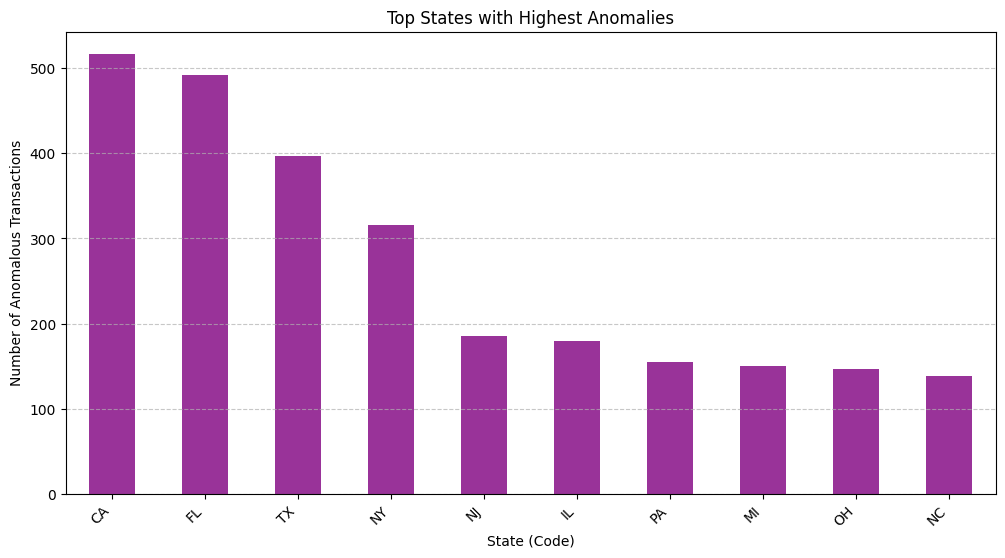

  State_Code_of_the_Provider  Anomaly_Flag      State_Name
0                         CA           517      California
1                         FL           492         Florida
2                         TX           397           Texas
3                         NY           316        New York
4                         NJ           185             NaN
5                         IL           179        Illinois
6                         PA           155    Pennsylvania
7                         MI           150        Michigan
8                         OH           147            Ohio
9                         NC           138  North Carolina


In [25]:
import matplotlib.pyplot as plt

# State abbreviations mapping (example subset)
state_abbreviations = {
    'CA': 'California', 'TX': 'Texas', 'NY': 'New York',
    'FL': 'Florida', 'IL': 'Illinois', 'PA': 'Pennsylvania',
    'OH': 'Ohio', 'GA': 'Georgia', 'NC': 'North Carolina', 'MI': 'Michigan'
}

# Filter for anomaly transactions
anomalies_by_state = predicted_data[predicted_data['Anomaly_Flag'] == 1].groupby('State_Code_of_the_Provider')['Anomaly_Flag'].count()

# Sort and take the top states with the highest anomalies
top_anomaly_states = anomalies_by_state.sort_values(ascending=False).head(10)

# Add state abbreviations for better interpretability
top_anomaly_states_df = top_anomaly_states.reset_index()
top_anomaly_states_df['State_Name'] = top_anomaly_states_df['State_Code_of_the_Provider'].map(state_abbreviations)

# Plot the top states with anomalies
plt.figure(figsize=(12, 6))
top_anomaly_states.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Top States with Highest Anomalies')
plt.ylabel('Number of Anomalous Transactions')
plt.xlabel('State (Code)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the top states with their full names
print(top_anomaly_states_df)


### **Interpretation and Insights for the Top 10 States with Highest Anomalies**

Based on the **Top 10 States with Highest Anomalies** and considering the healthcare domain, here are some **insights**:

---

### **1. California (CA) - 517 Anomalies**
- **Insights:**
  - **California** has the highest number of anomalies, which may be indicative of systemic billing issues or fraud risks in high-volume healthcare systems. 
  - **Large Healthcare Market:** California has a large, diverse population and a complex healthcare landscape with multiple payers (Medicare, Medicaid, private insurance). This can lead to issues with **upcoding**, **unnecessary services**, and **overbilling**.
  - **Medical Fraud Awareness:** The state has a history of medical fraud cases, particularly in urban areas with dense populations.
  - **Possible Indicators of Anomalies:** This could be linked to improper billing practices or the over-reporting of services like outpatient visits, which are frequent in California.

### **2. Florida (FL) - 492 Anomalies**
- **Insights:**
  - **Florida** is known for having a significant elderly population, with many individuals enrolled in **Medicare**. This makes it a target for **fraudulent billing** in medical services such as home health visits, diagnostic tests, and durable medical equipment (DME).
  - **High-risk Medicare fraud:** Fraudulent activities in Florida often involve **Medicare Advantage plans**, with inflated billing for routine services or unnecessary tests.
  - **Hotspot for Fraud Schemes:** Florida has historically been a hotspot for healthcare fraud, especially in the **home health care industry**.

### **3. Texas (TX) - 397 Anomalies**
- **Insights:**
  - **Texas** is a large state with diverse healthcare providers, from rural areas to urban centers. The state faces challenges with **under-regulation** in certain healthcare sectors, making it a potential hotspot for **upcoding** and **unnecessary service claims**.
  - **Healthcare Accessibility Issues:** With many underserved areas, Texas has a high concentration of **Medicaid** and **uninsured** patients, which can sometimes lead to fraudulent billing attempts.
  - **High Provider Variation:** Variability in healthcare providers’ behavior can lead to discrepancies in billing practices, especially in **outpatient services** and **diagnostic tests**.

### **4. New York (NY) - 316 Anomalies**
- **Insights:**
  - **New York** is a highly regulated state, but it also has an extremely large population with numerous healthcare facilities, leading to complexities in billing and claims processing.
  - **Urban Centers & Medicaid Fraud:** New York has a high concentration of **Medicaid** recipients, leading to possible fraudulent claims for **inpatient services**, **diagnostic testing**, and **mental health services**.
  - **Audit Activity:** The state is known for aggressive **fraud investigations**, so higher anomalies may be the result of increased scrutiny or underreporting of claims.

### **5. New Jersey (NJ) - 185 Anomalies**
- **Insights:**
  - **New Jersey** has a high population density and a high percentage of individuals covered by **Medicaid** and **Medicare**. Fraud in New Jersey is often linked to **overbilling** and **upcoding** of services such as diagnostic imaging or outpatient visits.
  - **Possible Healthcare Providers’ Malpractice:** In addition to fraud, there may also be issues with providers overutilizing services like **physical therapy** or unnecessary treatments.
  
### **6. Illinois (IL) - 179 Anomalies**
- **Insights:**
  - **Illinois** faces challenges in both urban and rural healthcare, with numerous hospitals and outpatient centers. The anomalies in Illinois could stem from **over-utilization** of healthcare services, particularly in **hospital readmissions** and **outpatient treatments**.
  - **Complex Medicaid System:** Illinois has a large Medicaid system, which can lead to billing errors or intentional fraud, especially in **mental health services** or **substance abuse treatments**.
  
### **7. Pennsylvania (PA) - 155 Anomalies**
- **Insights:**
  - **Pennsylvania** has a significant elderly population and is susceptible to **Medicare fraud**, particularly in **long-term care services**, **inpatient visits**, and **prescription drug abuse**.
  - **Highly-regulated State:** Pennsylvania has strict healthcare regulations, but anomalies may indicate fraud in **nursing home services**, **ambulatory care**, or **routine diagnostic testing**.

### **8. Michigan (MI) - 150 Anomalies**
- **Insights:**
  - **Michigan** has been known for issues with **fraudulent billing** in **Medicaid** services. This could involve **upcoding** in **hospital outpatient services** or unnecessary **physical therapy** claims.
  - **State Oversight Challenges:** There may also be issues with providers in underserved regions submitting false claims for medical services like **ambulatory surgery** or **home healthcare**.

### **9. Ohio (OH) - 147 Anomalies**
- **Insights:**
  - **Ohio** faces fraud risks, particularly in **Medicare and Medicaid services**. Anomalies here may involve **unnecessary tests**, **services not rendered**, or **false claims** related to outpatient visits and **Durable Medical Equipment (DME)**.
  - **Healthcare Access Issues:** Ohio has regions with both affluent and underserved populations, leading to varying healthcare access and fraud risks.

### **10. North Carolina (NC) - 138 Anomalies**
- **Insights:**
  - **North Carolina** has a significant **Medicaid** population, and anomalies may be linked to **billing errors** or **fraudulent claims** involving **inpatient hospital stays**, **medication overuse**, or **mental health services**.
  - **Higher Anomalies in Rural Areas:** Rural healthcare providers may be more prone to fraudulent billing due to **lack of oversight** in remote areas.

---

### **Conclusion:**
1. **High Anomaly States**:
   - **California, Florida, and Texas** are the states with the highest anomaly counts, potentially indicative of fraudulent activities in high-volume areas like outpatient visits, diagnostic testing, and home healthcare services.
  
2. **Fraudulent Patterns**:
   - Anomalies are **concentrated in specific service categories** such as **outpatient visits, diagnostic imaging**, and **Durable Medical Equipment** (DME). Fraud in **Medicaid** and **Medicare** programs is a key concern in these states, especially related to elderly and low-income populations.
  
3. **Regional Analysis**:
   - States with large, diverse populations (California, Florida, Texas) tend to have higher anomalies due to a combination of factors: complex billing systems, **Medicare and Medicaid fraud**, and **provider misbilling**.

---

These insights can guide further exploration into **fraud prevention measures** in high-risk states and help **detect fraudulent providers** based on their transaction patterns.

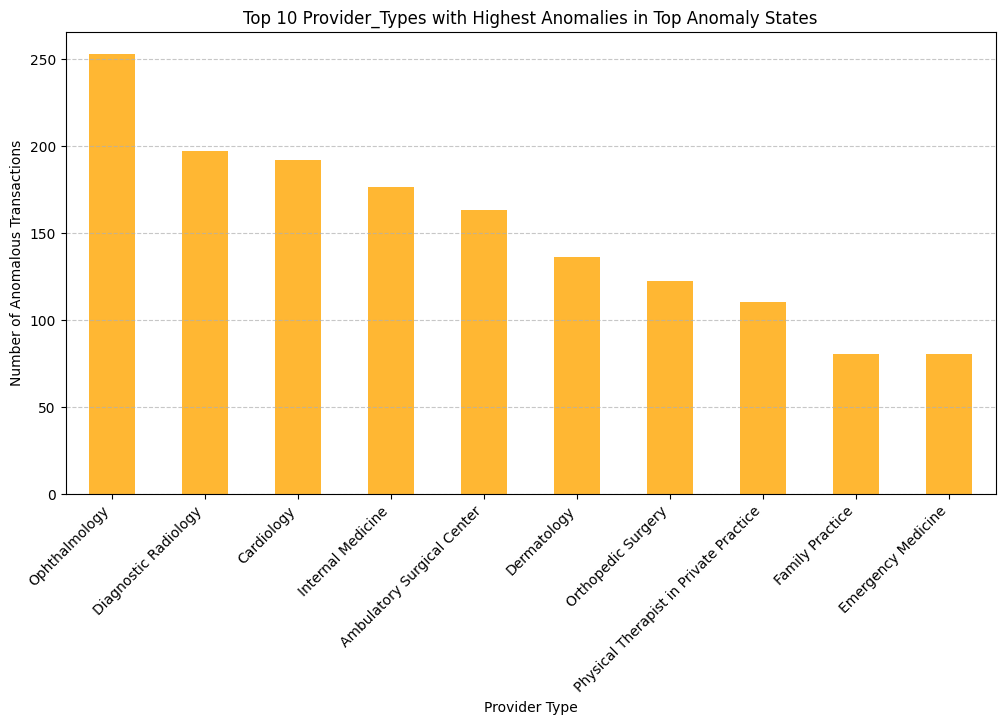

                            Provider_Type  Number_of_Anomalies
0                           Ophthalmology                  253
1                    Diagnostic Radiology                  197
2                              Cardiology                  192
3                       Internal Medicine                  176
4              Ambulatory Surgical Center                  163
5                             Dermatology                  136
6                      Orthopedic Surgery                  122
7  Physical Therapist in Private Practice                  110
8                         Family Practice                   80
9                      Emergency Medicine                   80


In [26]:
# Define top anomaly states (from previous analysis)
top_states = top_anomaly_states.index.tolist()

# Filter data for rows within the top anomaly states
filtered_data = predicted_data[
    (predicted_data['State_Code_of_the_Provider'].isin(top_states)) & 
    (predicted_data['Anomaly_Flag'] == 1)
]

# Group by Provider_Type and count anomalies
provider_anomalies_in_states = filtered_data.groupby('Provider_Type')['Anomaly_Flag'].count()

# Sort and select the top 10 Provider_Types with highest anomalies
top_10_provider_anomalies = provider_anomalies_in_states.sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
top_10_provider_anomalies.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 10 Provider_Types with Highest Anomalies in Top Anomaly States')
plt.ylabel('Number of Anomalous Transactions')
plt.xlabel('Provider Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the data as a DataFrame for reference
top_10_provider_anomalies_df = top_10_provider_anomalies.reset_index()
top_10_provider_anomalies_df.columns = ['Provider_Type', 'Number_of_Anomalies']
print(top_10_provider_anomalies_df)


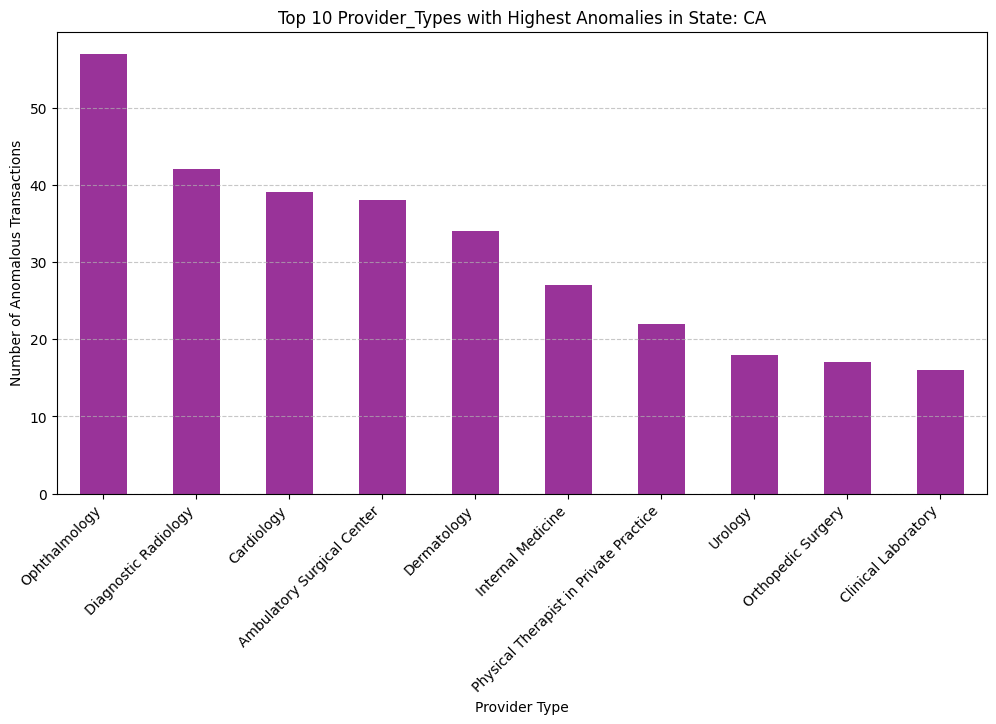

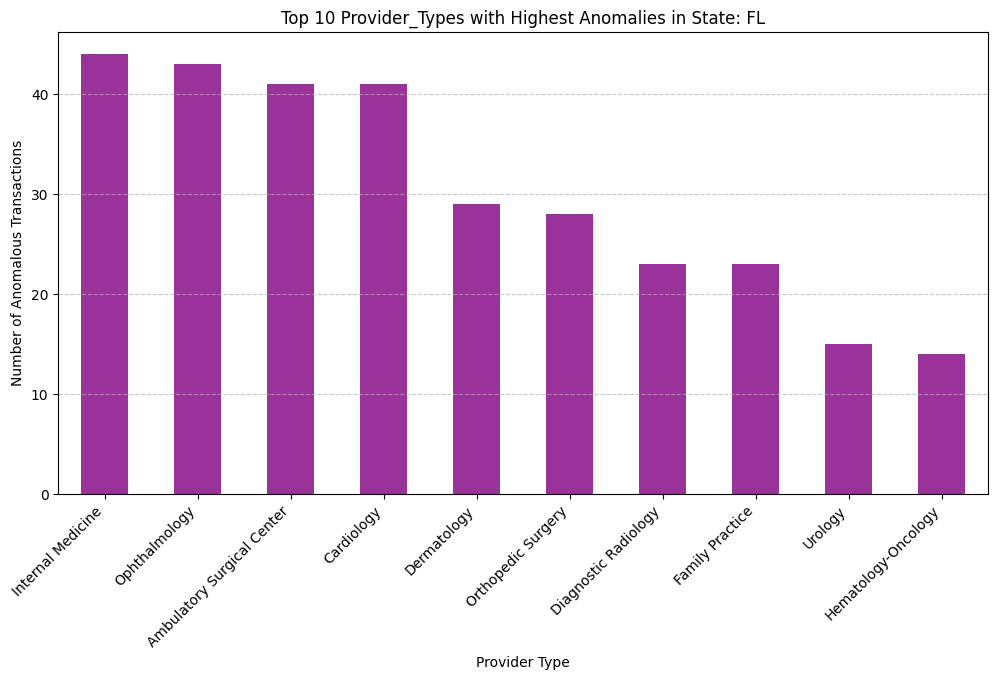

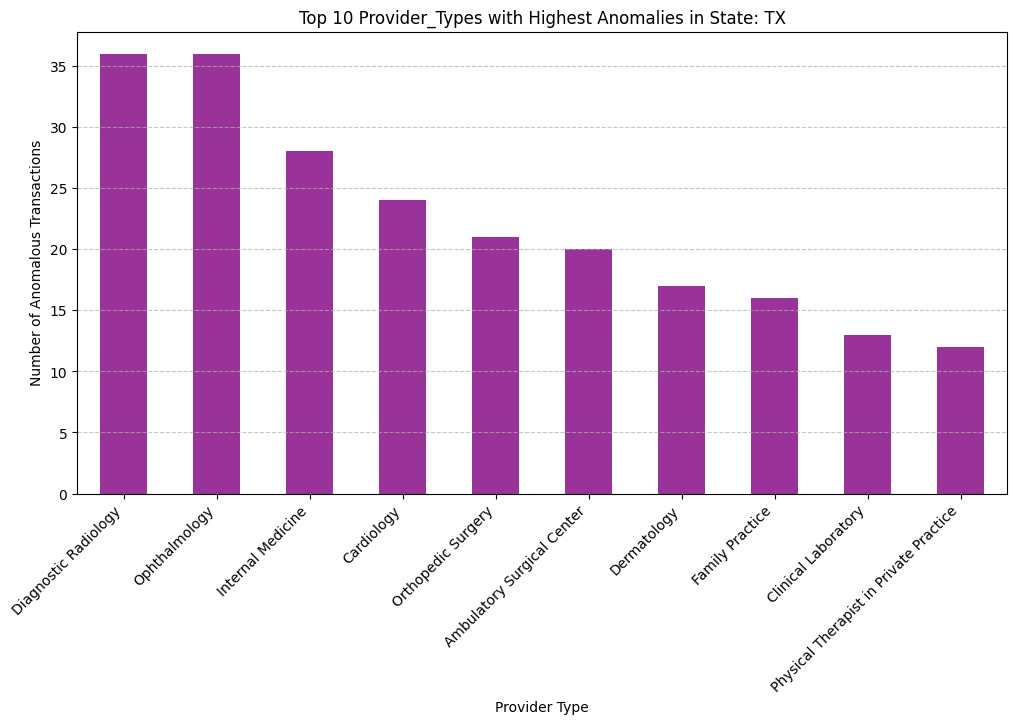

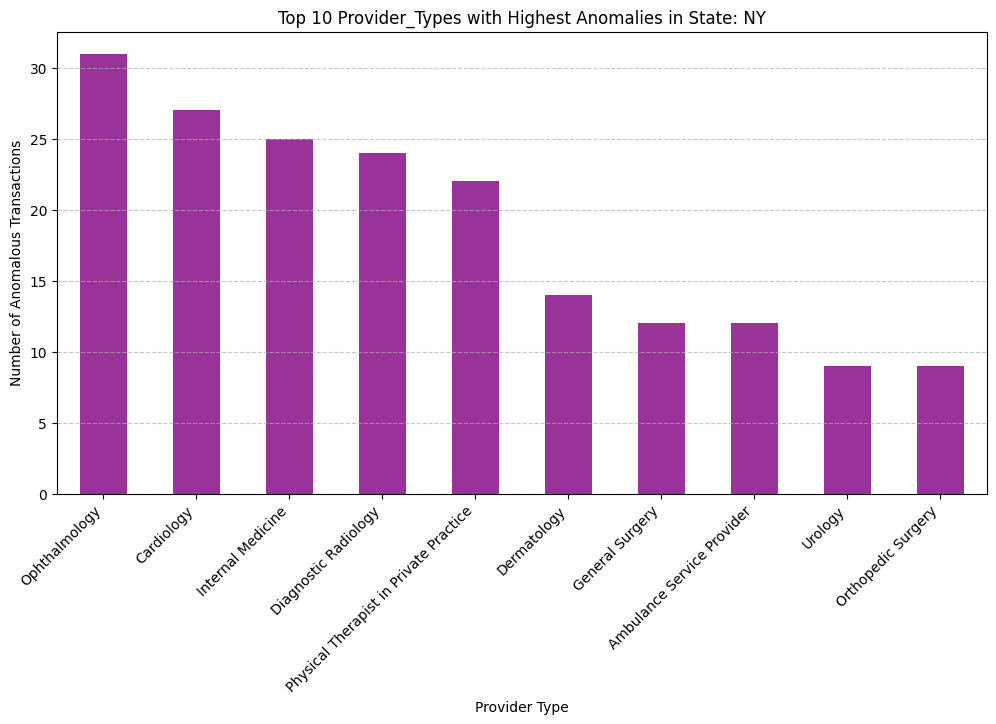

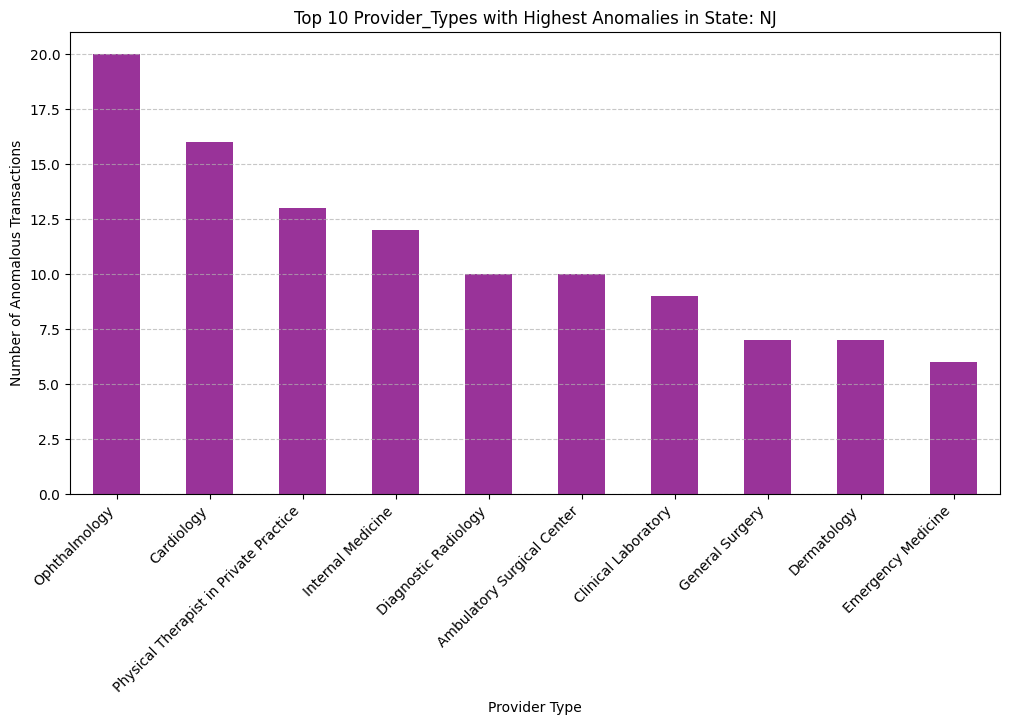

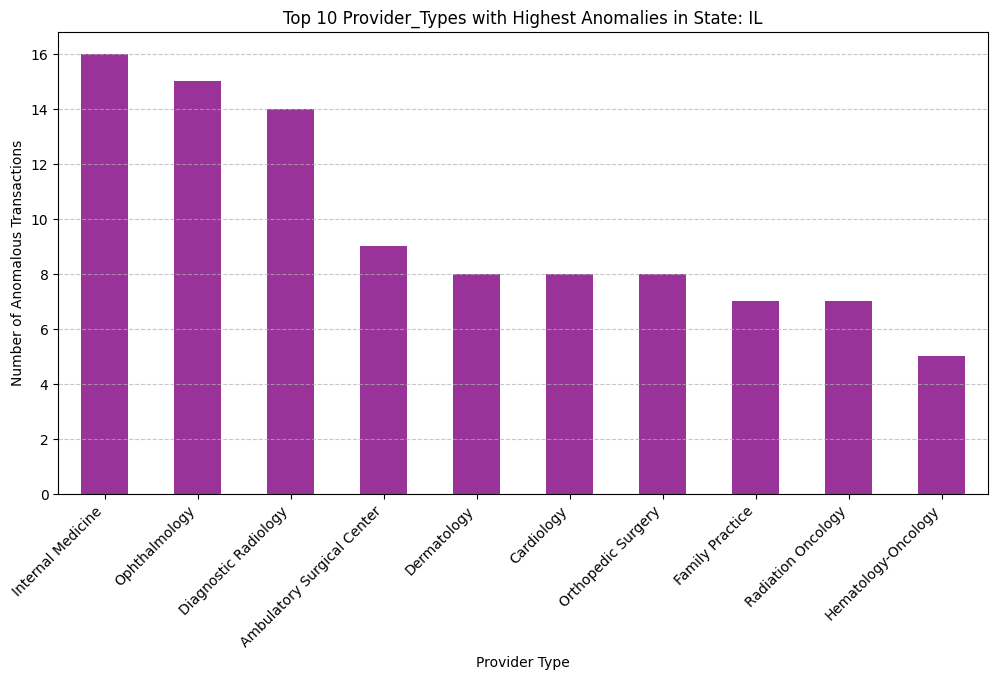

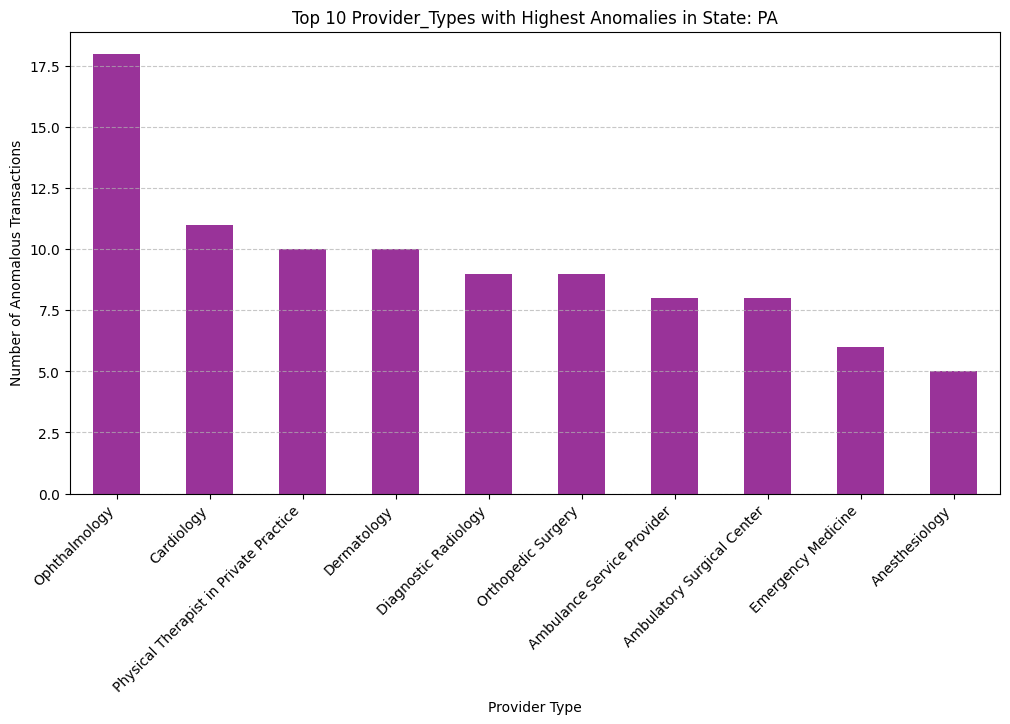

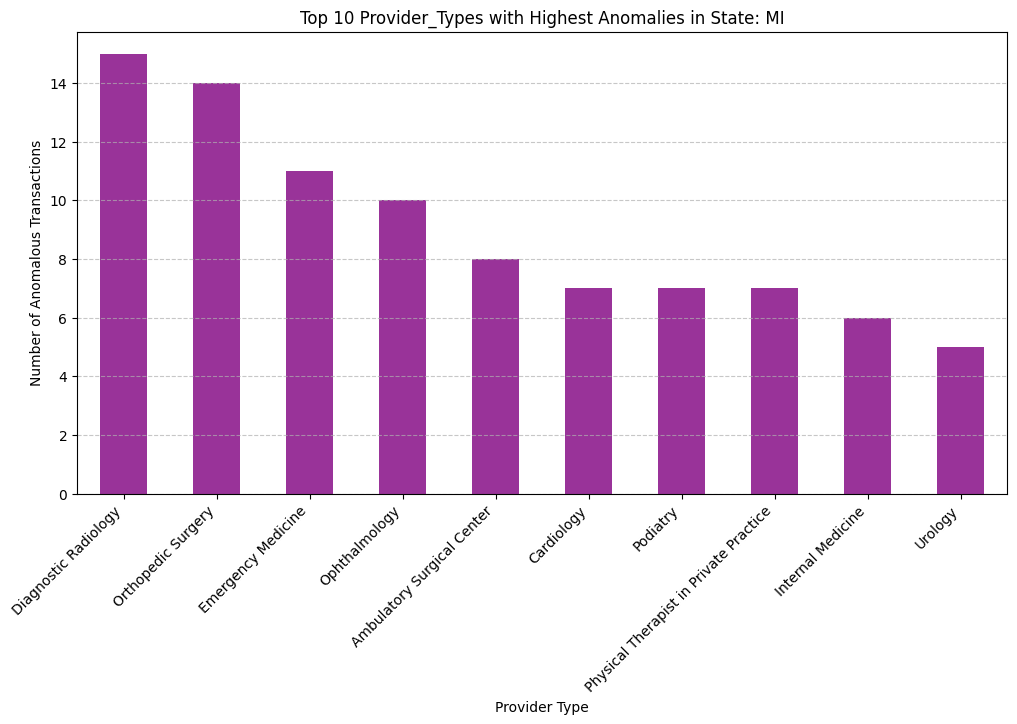

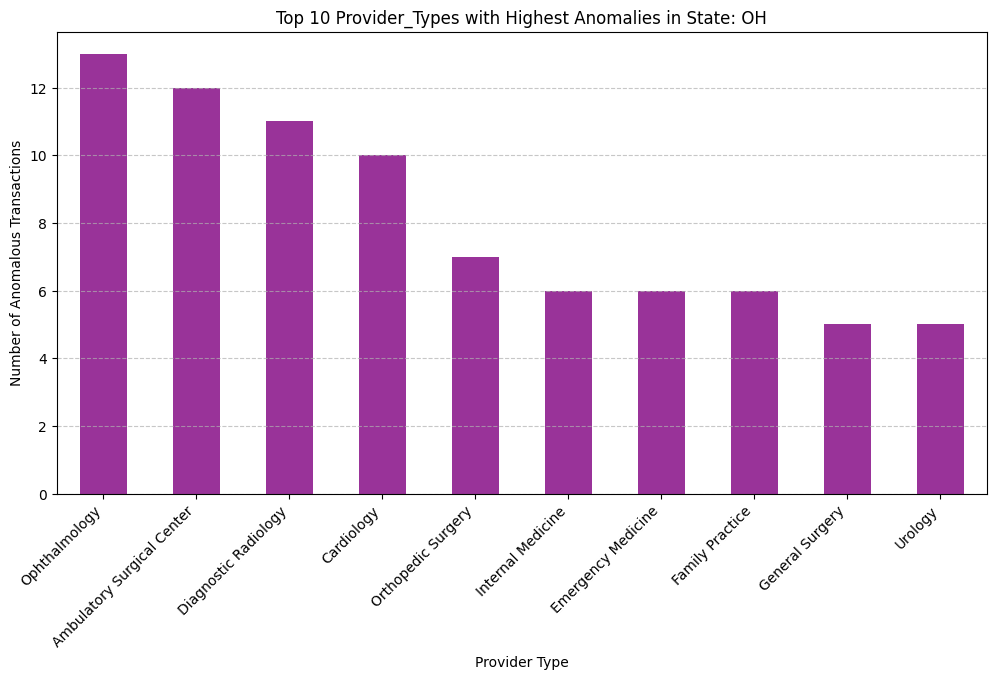

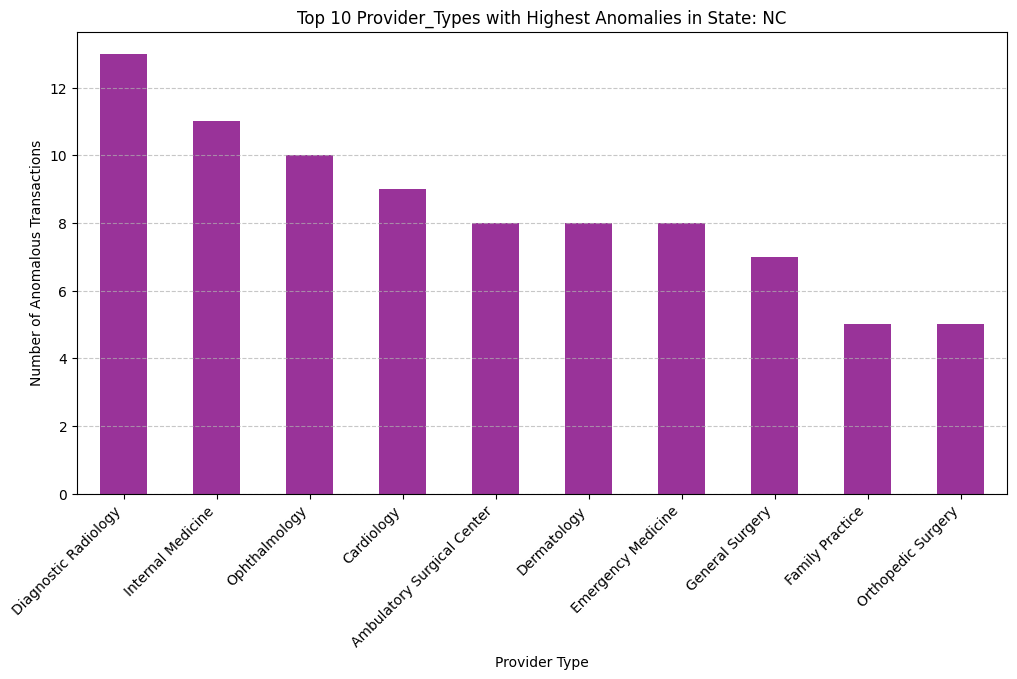

In [28]:
import matplotlib.pyplot as plt

# Step 1: Rank states by anomalies
states_by_anomalies = predicted_data[predicted_data['Anomaly_Flag'] == 1].groupby('State_Code_of_the_Provider')['Anomaly_Flag'].count()
top_10_states = states_by_anomalies.sort_values(ascending=False).head(10)

# Step 2: Loop through each of the top 10 states
for state in top_10_states.index:
    # Step 3: Filter data for the current state
    state_data = predicted_data[
        (predicted_data['State_Code_of_the_Provider'] == state) &
        (predicted_data['Anomaly_Flag'] == 1)
    ]
    
    # Group by Provider_Type and count anomalies
    provider_anomalies = state_data.groupby('Provider_Type')['Anomaly_Flag'].count()
    
    # Sort and select the top 10 Provider_Types
    top_10_providers = provider_anomalies.sort_values(ascending=False).head(10)
    
    # Plot the top 10 Provider_Types for the current state
    plt.figure(figsize=(12, 6))
    top_10_providers.plot(kind='bar', color='purple', alpha=0.8)
    plt.title(f'Top 10 Provider_Types with Highest Anomalies in State: {state}')
    plt.ylabel('Number of Anomalous Transactions')
    plt.xlabel('Provider Type')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


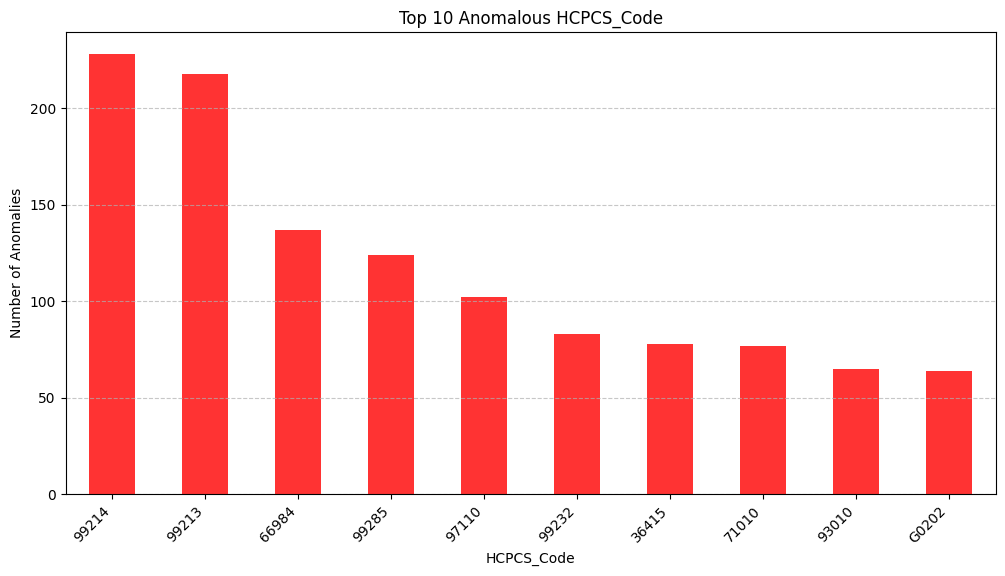

In [29]:
import matplotlib.pyplot as plt

# Filter for anomalies
anomalous_data = predicted_data[predicted_data['Anomaly_Flag'] == 1]

# Group by HCPCS_Code and count anomalies
hcpcs_anomalies = anomalous_data.groupby('HCPCS_Code')['Anomaly_Flag'].count()

# Sort and get the top 10 HCPCS_Code
top_10_hcpcs = hcpcs_anomalies.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_hcpcs.plot(kind='bar', color='red', alpha=0.8)
plt.title('Top 10 Anomalous HCPCS_Code')
plt.ylabel('Number of Anomalies')
plt.xlabel('HCPCS_Code')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Explanation of HCPCS Codes:
- 99214 and 99213 are related to office visits for evaluation and management of established patients.
- 66984 relates to cataract surgery, specifically extracapsular removal with intraocular lens insertion.
- 99285 refers to a high-complexity emergency department visit.
- 97110 pertains to therapeutic exercises provided as part of physical therapy.
- 99232 is related to a follow-up visit with moderate complexity.
- 36415 is for blood collection via venipuncture.
- 71010 represents a chest x-ray.
- 93010 refers to a routine electrocardiogram.
- G0202 relates to screening mammography.
## Insights:
- These codes seem to represent a mix of office visits, medical procedures, diagnostic tests, and emergency visits.
- The high number of anomalies in certain codes (like 99214, 99213, and 66984) may indicate fraudulent claims, outliers, or erroneous data entries, especially if there are unexpected patterns for these common services.

In [22]:
predicted_data

,Unnamed: 0,Number_of_Services,Number_of_Medicare_Beneficiaries,Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services,Average_Submitted_Charge_Amount,Average_Medicare_Payment_Amount,Average_Medicare_Allowed_Amount,Average_Medicare_Standardized_Amount,HCPCS_Code,Provider_Type,Place_of_Service,State_Code_of_the_Provider,Medicare_Participation_Indicator,Payment_to_Charge_Ratio,Allowed_to_Charge_Ratio,Anomaly_Flag
0,0,27.0,24.0,27.0,305.211111,157.262222,200.587778,160.908889,99223,Internal Medicine,F,MO,Y,0.515257,0.657210,0
1,1,175.0,175.0,175.0,548.800000,118.830000,123.730000,135.315257,G0202,Obstetrics & Gynecology,O,NC,Y,0.216527,0.225456,0
2,2,32.0,13.0,32.0,155.000000,64.439688,90.650000,60.595937,99348,Podiatry,O,CT,Y,0.415740,0.584839,0
3,3,20.0,18.0,20.0,5.000000,3.430000,3.500000,3.430000,81002,Internal Medicine,O,MO,Y,0.686000,0.700000,0
4,4,33.0,24.0,31.0,40.000000,19.539394,26.520000,19.057576,96372,Internal Medicine,O,FL,Y,0.488485,0.663000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,20.0,20.0,20.0,214.000000,60.725500,85.372500,62.248500,97162,Physical Therapist in Private Practice,O,IL,Y,0.283764,0.398937,0
99996,99996,136.0,107.0,136.0,144.051471,30.006176,61.270000,37.040221,99213,Nurse Practitioner,O,OR,Y,0.208302,0.425334,0
99997,99997,11.0,11.0,11.0,109.545455,14.090000,17.980000,14.620000,93320,Cardiology,F,MO,Y,0.128622,0.164133,0
99998,99998,12.0,12.0,12.0,65.000000,29.930000,30.540000,25.320000,G0008,Internal Medicine,O,NY,Y,0.460462,0.469846,0


In [30]:
top_10_hcpcs

HCPCS_Code
99214    228
99213    218
66984    137
99285    124
97110    102
99232     83
36415     78
71010     77
93010     65
G0202     64
Name: Anomaly_Flag, dtype: int64